In [1]:
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy


In [22]:
n = 24
p = 10

temp = np.array([75.0, 77.0, 76.0, 73.0, 69.0, 68.0, 63.0, 59.0, 57.0, 55.0, 54.0, 52.0, 50.0, 50.0, 49.0, 49.0,
49.0, 50.0, 54.0, 56.0, 59.0, 63.0, 67.0, 72.0 ])

ts = np.arange(0,n)+1
hrs = np.copy(ts)

f = np.copy(temp).T

X = []

for i in range(p+1):
    X.append(hrs**i)
X = np.array(X).T

In [23]:
alpha_Ls = np.linalg.pinv(X) @ f
f_Ls = X @ alpha_Ls

In [27]:
#LASSO
Lasso_model = linear_model.Lasso(alpha=1.0,max_iter = 1000000,tol=0.000000001)
Lasso_model.fit(X,f)
alpha_Lasso = Lasso_model.coef_
f_Lasso = X @ alpha_Lasso

#ridge regression
Ridge_model = linear_model.Ridge(alpha=1.0)
Ridge_model.fit(X,f)
alpha_Ridge = Ridge_model.coef_
f_Ridge = X @ alpha_Ridge

#ElasticNet
Enet_model = linear_model.ElasticNet(alpha=1.0,random_state=0,tol=0.000000001, max_iter = 1000000)
Enet_model.fit(X,f)
alpha_Enet= Enet_model.coef_
f_Enet = X @ alpha_Enet


e1 = np.linalg.norm(f-f_Ls,ord=2)/np.linalg.norm(f,ord=2)
e2 = np.linalg.norm(f-f_lasso,ord=2)/np.linalg.norm(f,ord=2)
e3 = np.linalg.norm(f-f_ridge,ord=2)/np.linalg.norm(f,ord=2)
e4 = np.linalg.norm(f-f_Enet,ord=2)/np.linalg.norm(f,ord=2)

print(e1)
print(e2)
print(e3)
print(e4)

/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.63091124962033, tolerance: 2.1445e-06
  model = cd_fast.enet_coordinate_descent(
/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.008739727593563453
1.25748223625849
1.2323852305197875
1.2633699160099556


/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.63833357717711, tolerance: 2.1445e-06
  model = cd_fast.enet_coordinate_descent(


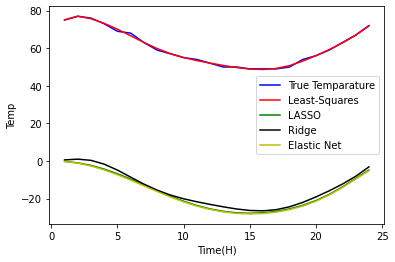

In [28]:
fig = plt.figure()
plt.plot(hours, f, color='b',label='True Temparature')
plt.plot(hours, f_Ls, color='r',label='Least-Squares')
plt.plot(hours, f_Lasso, color='g',label='LASSO')
plt.plot(hours, f_Ridge, color='k',label='Ridge')
plt.plot(hours, f_Enet, color='y',label='Elastic Net')
plt.ylabel('Temp')
plt.xlabel('Time(H)')
plt.legend()
plt.show()

In [34]:
Corrupt_Temp = np.array([75.0, 0.0, 76.0, 73.0, 69.0, 68.0, 63.0, 59.0,
57.0, 55.0, 54.0, 52.0, 50.0, 50.0, 49.0, 49.0,
49.0, 50.0, 54.0, 56.0, 59.0, 63.0, 67.0, 72.0 ])   #second temperature reading corrupted as 0.0
Ct = np.arange(0,n)+1
Chours = np.copy(Ct)

f_corrupt = np.copy(Corrupt_Temp).T

X_corrupt = []
for i in range(p+1):
    X_corrupt.append(Chours**i)
X_corrupt = np.array(X_corrupt).T

In [35]:
#Least square
alpha_Ls_corrupt = np.linalg.pinv(Xc) @ fc
f_Lsc = Xc @ alpha_Ls_corrupt

In [36]:
#LASSO
Lasso_model_corrupt = linear_model.Lasso(alpha=1.0)
Lasso_model_corrupt.fit(X_corrupt,f_corrupt)
alpha_Lasso_corrupt = Lasso_model_corrupt.coef_
f_Lasso_corrupt = Xc @ alpha_Lasso_corrupt

#Ridge regression
Ridge_model_corrupt = linear_model.Ridge(alpha=1.0)
Ridge_model_corrupt.fit(X_corrupt,f_corrupt)
alpha_Ridge_corrupt = Ridge_model_corrupt.coef_
f_Ridgec = Xc @ alpha_Ridge_corrupt

#ElasticNet
Enet_model_corrupt = linear_model.ElasticNet(alpha=1.0,random_state=0)
Enet_model_corrupt.fit(X_corrupt,f_corrupt)
alpha_Enet_corrupt= Enet_model_corrupt.coef_
f_Enet_corrupt = Xc @ alpha_Enet_corrupt


Ce1 = np.linalg.norm(fc-f_Lsc,ord=2)/np.linalg.norm(fc,ord=2)
Ce2 = np.linalg.norm(fc-f_lassoc,ord=2)/np.linalg.norm(fc,ord=2)
Ce3 = np.linalg.norm(fc-f_ridgec,ord=2)/np.linalg.norm(fc,ord=2)
Ce4 = np.linalg.norm(fc-f_eNetc,ord=2)/np.linalg.norm(fc,ord=2)

print(Ce1)
print(Ce2)
print(Ce3)
print(Ce4)

0.18924977207425844
0.9225426006330966
0.9981289920354304
0.9642709337026032


/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2219.257940530224, tolerance: 0.5246958333333335
  model = cd_fast.enet_coordinate_descent(
/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2215.457362400154, tolerance: 0.5246958333333335
  model = cd_fast.enet_coordinate_descent(


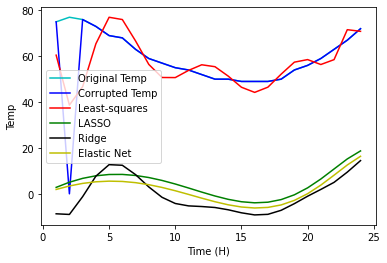

In [37]:
fig = plt.figure()
plt.plot(hours, f, color='c',label='Original Temp')
plt.plot(hours, fc, color='b',label='Corrupted Temp')
plt.plot(hours, f_Lsc, color='r',label='Least-squares')
plt.plot(hours, f_lassoc, color='g',label='LASSO')
plt.plot(hours, f_ridgec, color='k',label='Ridge')
plt.plot(hours, f_eNetc, color='y',label='Elastic Net')
plt.ylabel('Temp')
plt.xlabel('Time (H)')
plt.legend()
plt.show()

In [46]:
import statistics

var_1=[]
var_2=[]
var_3=[]
var_4=[]

for i in range(5):
    C_temp2=temp
    C_temp2[i]=0.0

    Ct2 = np.arange(0,n)+1
    Chours2 = np.copy(Ct2)
    fc2 = np.copy(C_temp2).T
    Xc2 = []
  
    for i in range(p+1):
        Xc2.append(Chours2**i)
    
    Xc2 = np.array(Xc2).T

    #Least square
    alpha_Lsqc = np.linalg.pinv(Xc2) @ fc2
    v1=statistics.variance(alpha_Lsqc)
    var_1.append(v1)

    #LASSO
    Lasso_model_corrupt = linear_model.Lasso(alpha=1.0,tol=0.0001,max_iter=10000)
    Lasso_model_corrupt.fit(Xc2,fc2)
    alpha_Lasso_corrupt = Lasso_model_corrupt.coef_
    v2=statistics.variance(alpha_Lasso_corrupt)
    var_2.append(v2)
  
    #Ridge regression
    Ridge_modc = linear_model.Ridge(alpha=1.0)
    Ridge_modc.fit(Xc2,fc2)
    alpha_Ridge_corrupt = Ridge_model_corrupt.coef_
    v3=statistics.variance(alpha_Ridge_corrupt)
    var_3.append(v3)
  
    #ElasticNet
    Enet_model_corrupt = linear_model.ElasticNet(alpha=1.0,random_state=0,tol=0.0001,max_iter=10000)
    Enet_model_corrupt.fit(Xc2,fc2)
    alpha_Enet_corrupt= enet_modc.coef_
    v4=statistics.variance(alpha_Enet_corrupt)
    var_4.append(v4)

/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1147.9077187386752, tolerance: 1.85365
  model = cd_fast.enet_coordinate_descent(
/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109.2467884425737, tolerance: 1.85365
  model = cd_fast.enet_coordinate_descent(
/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

[92.5587094116392, 92.5587094116392, 92.5587094116392, 92.5587094116392, 92.5587094116392]
[1.7471792271938094, 1.7471792271938094, 1.7471792271938094, 1.7471792271938094, 1.7471792271938094]
[15.653827715639782, 15.653827715639782, 15.653827715639782, 15.653827715639782, 15.653827715639782]
[0.2519250979064645, 0.2519250979064645, 0.2519250979064645, 0.2519250979064645, 0.2519250979064645]


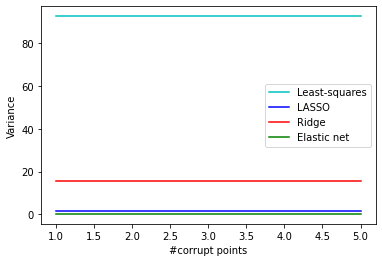

In [47]:
print(var_1)
print(var_2)
print(var_3)
print(var_4)

corrupt_points=np.arange(1,6)

fig = plt.figure()
plt.plot(corrupt_points, var_1, color='c',label='Least-squares')
plt.plot(corrupt_points, var_2, color='b',label='LASSO')
plt.plot(corrupt_points, var_3, color='r',label='Ridge')
plt.plot(corrupt_points, var_4, color='g',label='Elastic net')
plt.ylabel('Variance')
plt.xlabel('#corrupt points')
plt.legend()
plt.show()